In [1]:
from urllib.parse import urljoin
from bs4 import BeautifulSoup
import requests

all_listings = []

# Starting URL
url = 'https://www.zillow.com/canonsburg-pa-15317/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22isMapVisible%22%3Atrue%2C%22mapBounds%22%3A%7B%22west%22%3A-80.30558979467773%2C%22east%22%3A-80.03264820532226%2C%22south%22%3A40.16778601644183%2C%22north%22%3A40.374466866808774%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A64017%2C%22regionType%22%3A7%7D%5D%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D'



url = 'https://www.zillow.com/canonsburg-pa-15317/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22isMapVisible%22%3Atrue%2C%22mapBounds%22%3A%7B%22west%22%3A-80.30558979467773%2C%22east%22%3A-80.03264820532226%2C%22south%22%3A40.16778601644183%2C%22north%22%3A40.374466866808774%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A64017%2C%22regionType%22%3A7%7D%5D%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A12%7D'
headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }
#response = requests.get(url, headers= headers)



# pagination for multiple search page results and extract listing details
while url:
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        
        # Extract property cards from the current page
        cards = soup.find_all("div", class_="StyledPropertyCardDataWrapper-c11n-8-84-3__sc-1omp4c3-0 bKpguY property-card-data")
        
        # Extract details from each property card and add to the list
        for card in cards:
            details = card.find('ul', class_='StyledPropertyCardHomeDetailsList-c11n-8-84-3__sc-1xvdaej-0 eYPFID')
            address = card.find('address', {'data-test': 'property-card-addr'})
            agent = card.find('div', class_='StyledPropertyCardDataArea-c11n-8-84-3__sc-yipmu-0 jretvB')
            price = card.find('span', class_='PropertyCardWrapper__StyledPriceLine-srp__sc-16e8gqd-1 iMKTKr')
            
            if details and address and agent and price:
                listing = {
                    'Address': address.get_text(strip=True),
                    'Agent': agent.get_text(strip=True),
                    'Price': price.get_text(strip=True),
                    'Details': details.get_text(strip=True)
                }
                all_listings.append(listing)
        
        # Find the link to the next page
        next_page = soup.find('a', {'title': 'Next page'})
        url = urljoin(url, next_page['href']) if next_page else None
    else:
        print(f"Error: {response.status_code}")
        break

# Print all listings
for i, listing in enumerate(all_listings, start=1):
    print(f"Listing {i}:")
    print(listing)
    print("\n")


Error: 403
Listing 1:
{'Address': '504 Orchard View Dr N, Canonsburg, PA 15317', 'Agent': 'Nichole Merrell', 'Price': '$419,000', 'Details': '3bds3ba1,960sqft'}


Listing 2:
{'Address': '327 Pleasant Ave, McMurray, PA 15317', 'Agent': 'Andrea Sweeney', 'Price': '$270,000', 'Details': '3bds2ba1,788sqft'}


Listing 3:
{'Address': '503 Hickory Cir N, Canonsburg, PA 15317', 'Agent': 'Susan Ulam', 'Price': '$160,000', 'Details': '2bds2ba884sqft'}


Listing 4:
{'Address': '132 Highland Dr, McMurray, PA 15317', 'Agent': 'Nichole Merrell', 'Price': '$465,000', 'Details': '5bds3ba2,372sqft'}


Listing 5:
{'Address': '128 Rifgon Dr, Canonsburg, PA 15317', 'Agent': 'Dana Christoff', 'Price': '$379,000', 'Details': '3bds4ba1,775sqft'}


Listing 6:
{'Address': '125 Trotwood Dr N, Canonsburg, PA 15317', 'Agent': 'John Fincham', 'Price': '$374,900', 'Details': '4bds3ba1,800sqft'}


Listing 7:
{'Address': '110 Demar Blvd, Canonsburg, PA 15317', 'Agent': 'Kelly Robinson', 'Price': '$215,000', 'Details'

In [2]:
# Print all listings
for i, listing in enumerate(all_listings, start=1):
    print(f"Listing {i}:")
    print(listing)
    print("\n")


Listing 1:
{'Address': '504 Orchard View Dr N, Canonsburg, PA 15317', 'Agent': 'Nichole Merrell', 'Price': '$419,000', 'Details': '3bds3ba1,960sqft'}


Listing 2:
{'Address': '327 Pleasant Ave, McMurray, PA 15317', 'Agent': 'Andrea Sweeney', 'Price': '$270,000', 'Details': '3bds2ba1,788sqft'}


Listing 3:
{'Address': '503 Hickory Cir N, Canonsburg, PA 15317', 'Agent': 'Susan Ulam', 'Price': '$160,000', 'Details': '2bds2ba884sqft'}


Listing 4:
{'Address': '132 Highland Dr, McMurray, PA 15317', 'Agent': 'Nichole Merrell', 'Price': '$465,000', 'Details': '5bds3ba2,372sqft'}


Listing 5:
{'Address': '128 Rifgon Dr, Canonsburg, PA 15317', 'Agent': 'Dana Christoff', 'Price': '$379,000', 'Details': '3bds4ba1,775sqft'}


Listing 6:
{'Address': '125 Trotwood Dr N, Canonsburg, PA 15317', 'Agent': 'John Fincham', 'Price': '$374,900', 'Details': '4bds3ba1,800sqft'}


Listing 7:
{'Address': '110 Demar Blvd, Canonsburg, PA 15317', 'Agent': 'Kelly Robinson', 'Price': '$215,000', 'Details': '3bds2ba-

In [3]:
#convert to pandas dataframe
import pandas as pd
df = pd.DataFrame(all_listings)

# Display the DataFrame
print(df)

                                          Address            Agent     Price  \
0     504 Orchard View Dr N, Canonsburg, PA 15317  Nichole Merrell  $419,000   
1            327 Pleasant Ave, McMurray, PA 15317   Andrea Sweeney  $270,000   
2         503 Hickory Cir N, Canonsburg, PA 15317       Susan Ulam  $160,000   
3             132 Highland Dr, McMurray, PA 15317  Nichole Merrell  $465,000   
4             128 Rifgon Dr, Canonsburg, PA 15317   Dana Christoff  $379,000   
...                                           ...              ...       ...   
2902     216 Thompsonville Rd, McMurray, PA 15317      Jim Dolanch  $249,000   
2903     1126 Bayberry Dr N, Canonsburg, PA 15317    Wendy Grandel  $560,000   
2904  LOT 2 55 Ridgewood Dr, Canonsburg, PA 15317   Karen Marshall  $150,000   
2905     LOT 1 Teepee Rd #1, Canonsburg, PA 15317  Lisa McLaughlin  $895,000   
2906        LOT 2 Thomas Rd, Canonsburg, PA 15317     Holly Corace  $650,000   

               Details  
0     3bds3ba1

In [5]:
df.dtypes

Address    object
Agent      object
Price      object
Details    object
dtype: object

In [6]:
#split the details column into beds, baths, and sqft
# Create new columns for Beds, Baths, and Sqft
#df[['Beds', 'Baths', 'Sqft']] = df['Details'].str.extract(r'(\d+)\D*(\d*)\D*(\d*)')

df['Beds'] = df['Details'].str.extract(r'(\d+)bds')
df['Baths'] = df['Details'].str.extract(r'(\d+)ba')
df['Sqft'] = df['Details'].str.extract(r'(\d{1,3}(?:,\d{3})?)sqft')

# Convert 'Sqft' column to numeric, removing commas
df['Sqft'] = pd.to_numeric(df['Sqft'].str.replace(',', ''), errors='coerce')


In [7]:
df.dtypes

Address     object
Agent       object
Price       object
Details     object
Beds        object
Baths       object
Sqft       float64
dtype: object

In [8]:
#check to make sure that details were extracted properly
df.head()

,Address,Agent,Price,Details,Beds,Baths,Sqft
0,"504 Orchard View Dr N, Canonsburg, PA 15317",Nichole Merrell,"$419,000","3bds3ba1,960sqft",3,3,1960.0
1,"327 Pleasant Ave, McMurray, PA 15317",Andrea Sweeney,"$270,000","3bds2ba1,788sqft",3,2,1788.0
2,"503 Hickory Cir N, Canonsburg, PA 15317",Susan Ulam,"$160,000",2bds2ba884sqft,2,2,884.0
3,"132 Highland Dr, McMurray, PA 15317",Nichole Merrell,"$465,000","5bds3ba2,372sqft",5,3,2372.0
4,"128 Rifgon Dr, Canonsburg, PA 15317",Dana Christoff,"$379,000","3bds4ba1,775sqft",3,4,1775.0


In [9]:
#check for null/ nans
df.isnull().sum()

Address       0
Agent         0
Price         0
Details       0
Beds       1601
Baths      1600
Sqft       1925
dtype: int64

In [10]:
#create Acres column for listings that have a lot size listed in details
df['Acres'] = df.apply(lambda row: float(row['Details'].split(' ')[0]) if 'acres lot' in row['Details'] else None, axis=1)

In [11]:
df.isnull().sum()

Address       0
Agent         0
Price         0
Details       0
Beds       1601
Baths      1600
Sqft       1925
Acres      1307
dtype: int64

In [14]:
#further investigate each column that has NaN
filtered_sqft_df = df[df['Sqft'].isnull()]

In [15]:
#different formats in the details column caused errors in beds being populated
filtered_sqft_df

,Address,Agent,Price,Details,Beds,Baths,Sqft,Acres
6,"110 Demar Blvd, Canonsburg, PA 15317",Kelly Robinson,"$215,000",3bds2ba--sqft,3,2,NaN,NaN
12,"157 E College St, Canonsburg, PA 15317",Valerie Loutsion,"$154,900",1bd1ba--sqft,NaN,1,NaN,NaN
13,"122 Scenery Cir, McMurray, PA 15317",John Zywan,"$449,000",4bds4ba--sqft,4,4,NaN,NaN
17,"612 Franklin Ave, Canonsburg, PA 15317",Jeffrey Walker,"$76,000",2bds2ba--sqft,2,2,NaN,NaN
25,"1124 Bayberry Dr N, Canonsburg, PA 15317",Wendy Grandel,"$595,000",3bds4ba--sqft,3,4,NaN,NaN
...,...,...,...,...,...,...,...,...
2902,"216 Thompsonville Rd, McMurray, PA 15317",Jim Dolanch,"$249,000",2.56 acres lot,NaN,NaN,NaN,2.56
2903,"1126 Bayberry Dr N, Canonsburg, PA 15317",Wendy Grandel,"$560,000",2bds3ba--sqft,2,3,NaN,NaN
2904,"LOT 2 55 Ridgewood Dr, Canonsburg, PA 15317",Karen Marshall,"$150,000",0.5 acres lot,NaN,NaN,NaN,0.50
2905,"LOT 1 Teepee Rd #1, Canonsburg, PA 15317",Lisa McLaughlin,"$895,000",7.78 acres lot,NaN,NaN,NaN,7.78


In [17]:
#update the bed, bath and sqft count if needed
import numpy as np
beds_mask = df['Details'].str.contains('bd') & df['Beds'].isna()
baths_mask = df['Details'].str.contains('ba') & df['Baths'].isna()

df.loc[beds_mask, 'Beds'] = df.loc[beds_mask, 'Details'].str.extract(r'(\d+)', expand=False)
df.loc[baths_mask, 'Baths'] = df.loc[baths_mask, 'Details'].str.extract(r'(\d+)', expand=False)

# Set Sqft to NaN when '--sqft' appears in 'Details'
df.loc[df['Details'].str.contains('--sqft'), 'Sqft'] = np.nan

In [18]:
df.isnull().sum()

Address       0
Agent         0
Price         0
Details       0
Beds       1600
Baths      1600
Sqft       1925
Acres      1307
dtype: int64

In [19]:
#repeat groupby that showed previous error
filtered_sqft_df = df[df['Sqft'].isnull()]

In [20]:
filtered_sqft_df

,Address,Agent,Price,Details,Beds,Baths,Sqft,Acres
6,"110 Demar Blvd, Canonsburg, PA 15317",Kelly Robinson,"$215,000",3bds2ba--sqft,3,2,NaN,NaN
12,"157 E College St, Canonsburg, PA 15317",Valerie Loutsion,"$154,900",1bd1ba--sqft,1,1,NaN,NaN
13,"122 Scenery Cir, McMurray, PA 15317",John Zywan,"$449,000",4bds4ba--sqft,4,4,NaN,NaN
17,"612 Franklin Ave, Canonsburg, PA 15317",Jeffrey Walker,"$76,000",2bds2ba--sqft,2,2,NaN,NaN
25,"1124 Bayberry Dr N, Canonsburg, PA 15317",Wendy Grandel,"$595,000",3bds4ba--sqft,3,4,NaN,NaN
...,...,...,...,...,...,...,...,...
2902,"216 Thompsonville Rd, McMurray, PA 15317",Jim Dolanch,"$249,000",2.56 acres lot,NaN,NaN,NaN,2.56
2903,"1126 Bayberry Dr N, Canonsburg, PA 15317",Wendy Grandel,"$560,000",2bds3ba--sqft,2,3,NaN,NaN
2904,"LOT 2 55 Ridgewood Dr, Canonsburg, PA 15317",Karen Marshall,"$150,000",0.5 acres lot,NaN,NaN,NaN,0.50
2905,"LOT 1 Teepee Rd #1, Canonsburg, PA 15317",Lisa McLaughlin,"$895,000",7.78 acres lot,NaN,NaN,NaN,7.78


In [21]:
#appears that different formats have now been accounted for
df

,Address,Agent,Price,Details,Beds,Baths,Sqft,Acres
0,"504 Orchard View Dr N, Canonsburg, PA 15317",Nichole Merrell,"$419,000","3bds3ba1,960sqft",3,3,1960.0,NaN
1,"327 Pleasant Ave, McMurray, PA 15317",Andrea Sweeney,"$270,000","3bds2ba1,788sqft",3,2,1788.0,NaN
2,"503 Hickory Cir N, Canonsburg, PA 15317",Susan Ulam,"$160,000",2bds2ba884sqft,2,2,884.0,NaN
3,"132 Highland Dr, McMurray, PA 15317",Nichole Merrell,"$465,000","5bds3ba2,372sqft",5,3,2372.0,NaN
4,"128 Rifgon Dr, Canonsburg, PA 15317",Dana Christoff,"$379,000","3bds4ba1,775sqft",3,4,1775.0,NaN
...,...,...,...,...,...,...,...,...
2902,"216 Thompsonville Rd, McMurray, PA 15317",Jim Dolanch,"$249,000",2.56 acres lot,NaN,NaN,NaN,2.56
2903,"1126 Bayberry Dr N, Canonsburg, PA 15317",Wendy Grandel,"$560,000",2bds3ba--sqft,2,3,NaN,NaN
2904,"LOT 2 55 Ridgewood Dr, Canonsburg, PA 15317",Karen Marshall,"$150,000",0.5 acres lot,NaN,NaN,NaN,0.50
2905,"LOT 1 Teepee Rd #1, Canonsburg, PA 15317",Lisa McLaughlin,"$895,000",7.78 acres lot,NaN,NaN,NaN,7.78


#visualizations + EDA

In [22]:
df.dtypes

Address     object
Agent       object
Price       object
Details     object
Beds        object
Baths       object
Sqft       float64
Acres      float64
dtype: object

#feature engineering

In [23]:
#still a lot of missing values; impute based on median for populated rows
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') 
df[['Beds', 'Baths','Sqft', 'Acres']] = imputer.fit_transform(df[['Beds', 'Baths', 'Sqft', 'Acres']])

In [25]:
#update price, beds, baths to int for analysis
df['Price'] = df['Price'].replace('[^\d]', '', regex=True).astype(int)

In [26]:
#create price per square foot and price per acre
df['Price_Per_Sqft'] = df['Price']/ df['Sqft']
df['Price_Per_Acre'] = df['Price']/ df['Acres']

In [27]:
#parse street name and city from Address
df['Street_Name'] = df['Address'].str.split(',').str[0].str.split(' ').str[1].str.strip()
df['City'] = df['Address'].str.split(',').str[1].str.strip()

In [28]:
df.head()

,Address,Agent,Price,Details,Beds,Baths,Sqft,Acres,Price_Per_Sqft,Price_Per_Acre,Street_Name,City
0,"504 Orchard View Dr N, Canonsburg, PA 15317",Nichole Merrell,419000,"3bds3ba1,960sqft",3.0,3.0,1960.0,7.2,213.775510,58194.444444,Orchard,Canonsburg
1,"327 Pleasant Ave, McMurray, PA 15317",Andrea Sweeney,270000,"3bds2ba1,788sqft",3.0,2.0,1788.0,7.2,151.006711,37500.000000,Pleasant,McMurray
2,"503 Hickory Cir N, Canonsburg, PA 15317",Susan Ulam,160000,2bds2ba884sqft,2.0,2.0,884.0,7.2,180.995475,22222.222222,Hickory,Canonsburg
3,"132 Highland Dr, McMurray, PA 15317",Nichole Merrell,465000,"5bds3ba2,372sqft",5.0,3.0,2372.0,7.2,196.037099,64583.333333,Highland,McMurray
4,"128 Rifgon Dr, Canonsburg, PA 15317",Dana Christoff,379000,"3bds4ba1,775sqft",3.0,4.0,1775.0,7.2,213.521127,52638.888889,Rifgon,Canonsburg


In [29]:
df.isnull().sum()

Address           0
Agent             0
Price             0
Details           0
Beds              0
Baths             0
Sqft              0
Acres             0
Price_Per_Sqft    0
Price_Per_Acre    0
Street_Name       0
City              0
dtype: int64

In [30]:
df.head()

,Address,Agent,Price,Details,Beds,Baths,Sqft,Acres,Price_Per_Sqft,Price_Per_Acre,Street_Name,City
0,"504 Orchard View Dr N, Canonsburg, PA 15317",Nichole Merrell,419000,"3bds3ba1,960sqft",3.0,3.0,1960.0,7.2,213.775510,58194.444444,Orchard,Canonsburg
1,"327 Pleasant Ave, McMurray, PA 15317",Andrea Sweeney,270000,"3bds2ba1,788sqft",3.0,2.0,1788.0,7.2,151.006711,37500.000000,Pleasant,McMurray
2,"503 Hickory Cir N, Canonsburg, PA 15317",Susan Ulam,160000,2bds2ba884sqft,2.0,2.0,884.0,7.2,180.995475,22222.222222,Hickory,Canonsburg
3,"132 Highland Dr, McMurray, PA 15317",Nichole Merrell,465000,"5bds3ba2,372sqft",5.0,3.0,2372.0,7.2,196.037099,64583.333333,Highland,McMurray
4,"128 Rifgon Dr, Canonsburg, PA 15317",Dana Christoff,379000,"3bds4ba1,775sqft",3.0,4.0,1775.0,7.2,213.521127,52638.888889,Rifgon,Canonsburg


In [31]:
df.dtypes

Address            object
Agent              object
Price               int32
Details            object
Beds              float64
Baths             float64
Sqft              float64
Acres             float64
Price_Per_Sqft    float64
Price_Per_Acre    float64
Street_Name        object
City               object
dtype: object

Data Visualization

In [32]:
#first, print out the summary stats to get a feel for the data
summary_stats = df.describe()
summary_stats

,Price,Beds,Baths,Sqft,Acres,Price_Per_Sqft,Price_Per_Acre
count,2907.000000,2907.000000,2907.000000,2907.000000,2907.000000,2907.000000,2907.000000
mean,525087.154799,2.780874,2.778122,2010.959064,6.462470,261.591580,105955.881320
std,247803.471019,0.422776,0.422153,85.592132,2.936317,124.061794,72612.111069
min,76000.000000,1.000000,1.000000,884.000000,0.500000,37.943085,10555.555556
25%,379990.000000,3.000000,3.000000,2003.000000,7.200000,174.467401,57726.465364
50%,560000.000000,3.000000,3.000000,2003.000000,7.200000,279.580629,79165.277778
75%,650000.000000,3.000000,3.000000,2003.000000,7.200000,324.513230,115038.560411
max,899000.000000,5.000000,4.000000,3180.000000,11.260000,448.826760,300000.000000


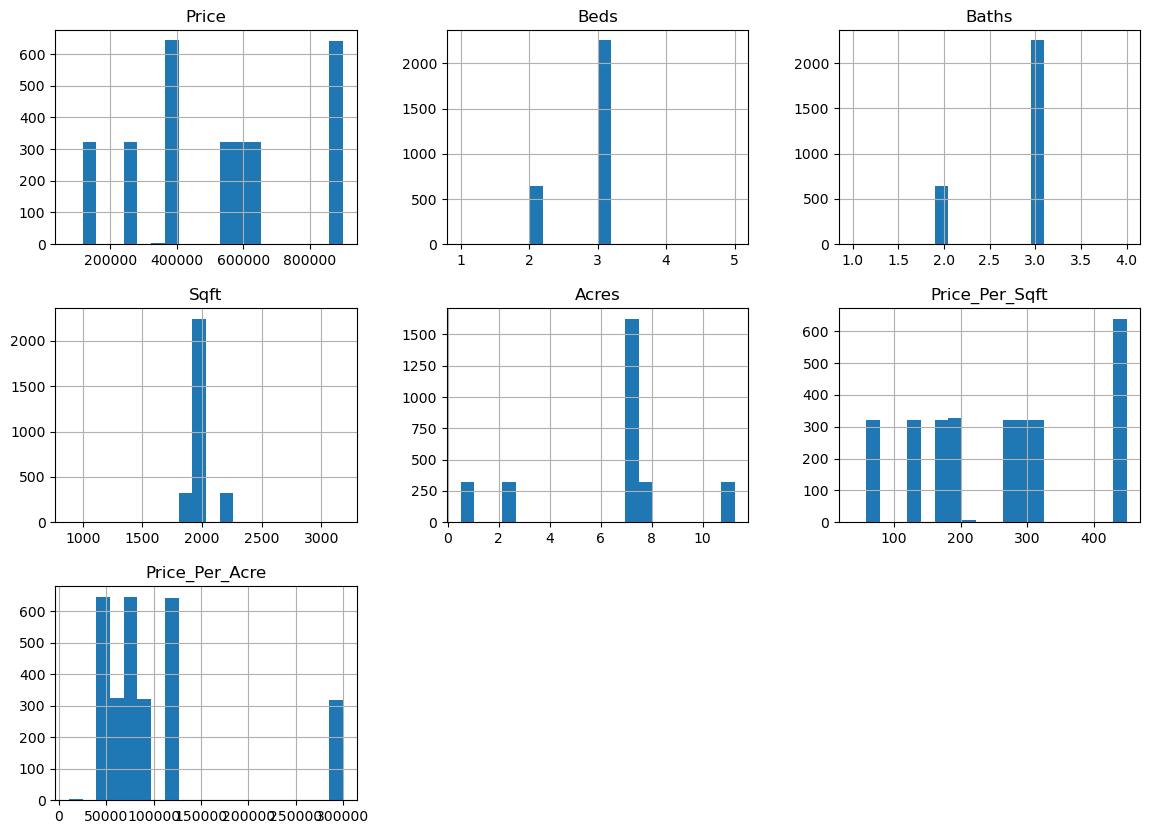

In [33]:
#plot histograms- some obvious skewness to the data
df.hist(bins= 20, figsize= (14, 10));

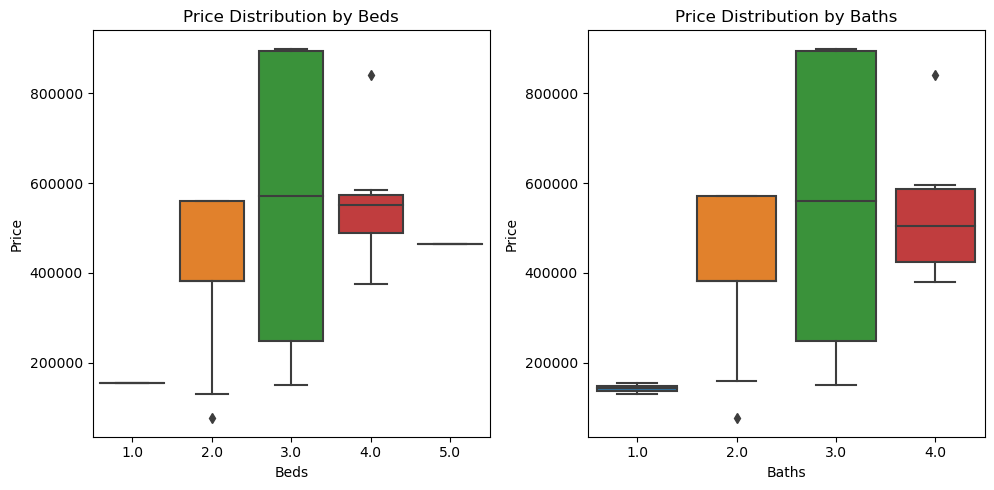

In [98]:
# Box plots for Beds, Baths, and Sqft
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Beds', y='Price', data=df)
plt.title('Price Distribution by Beds')

plt.subplot(1, 3, 2)
sns.boxplot(x='Baths', y='Price', data=df)
plt.title('Price Distribution by Baths')

plt.tight_layout()
plt.show()

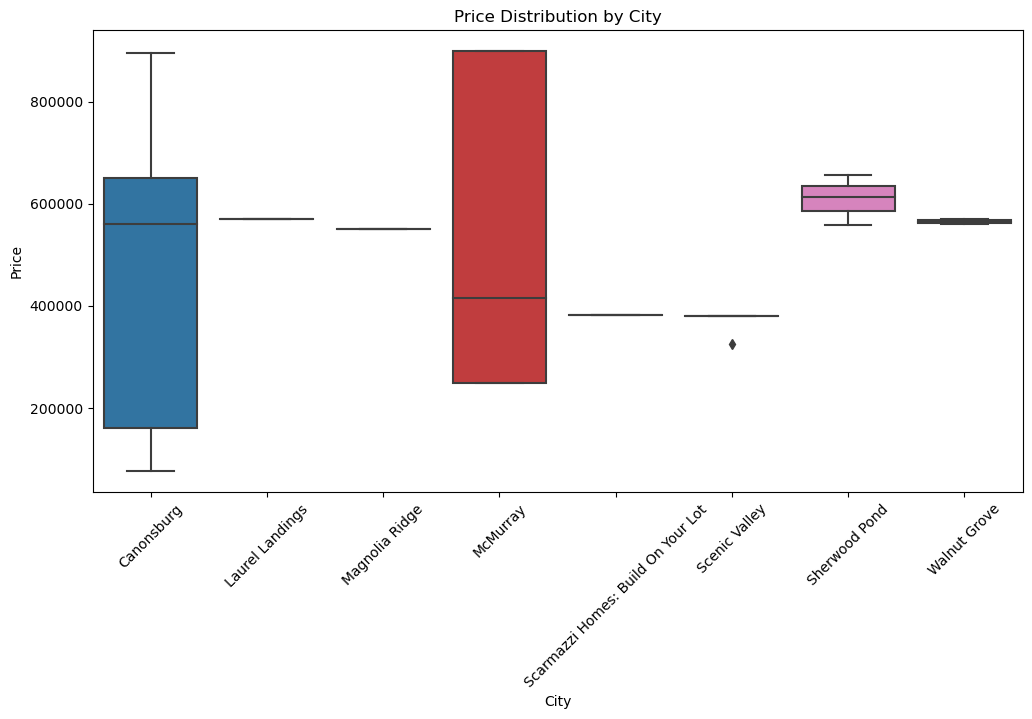

In [99]:
# Price distribution by City
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', data=df)
plt.title('Price Distribution by City')
plt.xticks(rotation=45)
plt.show()

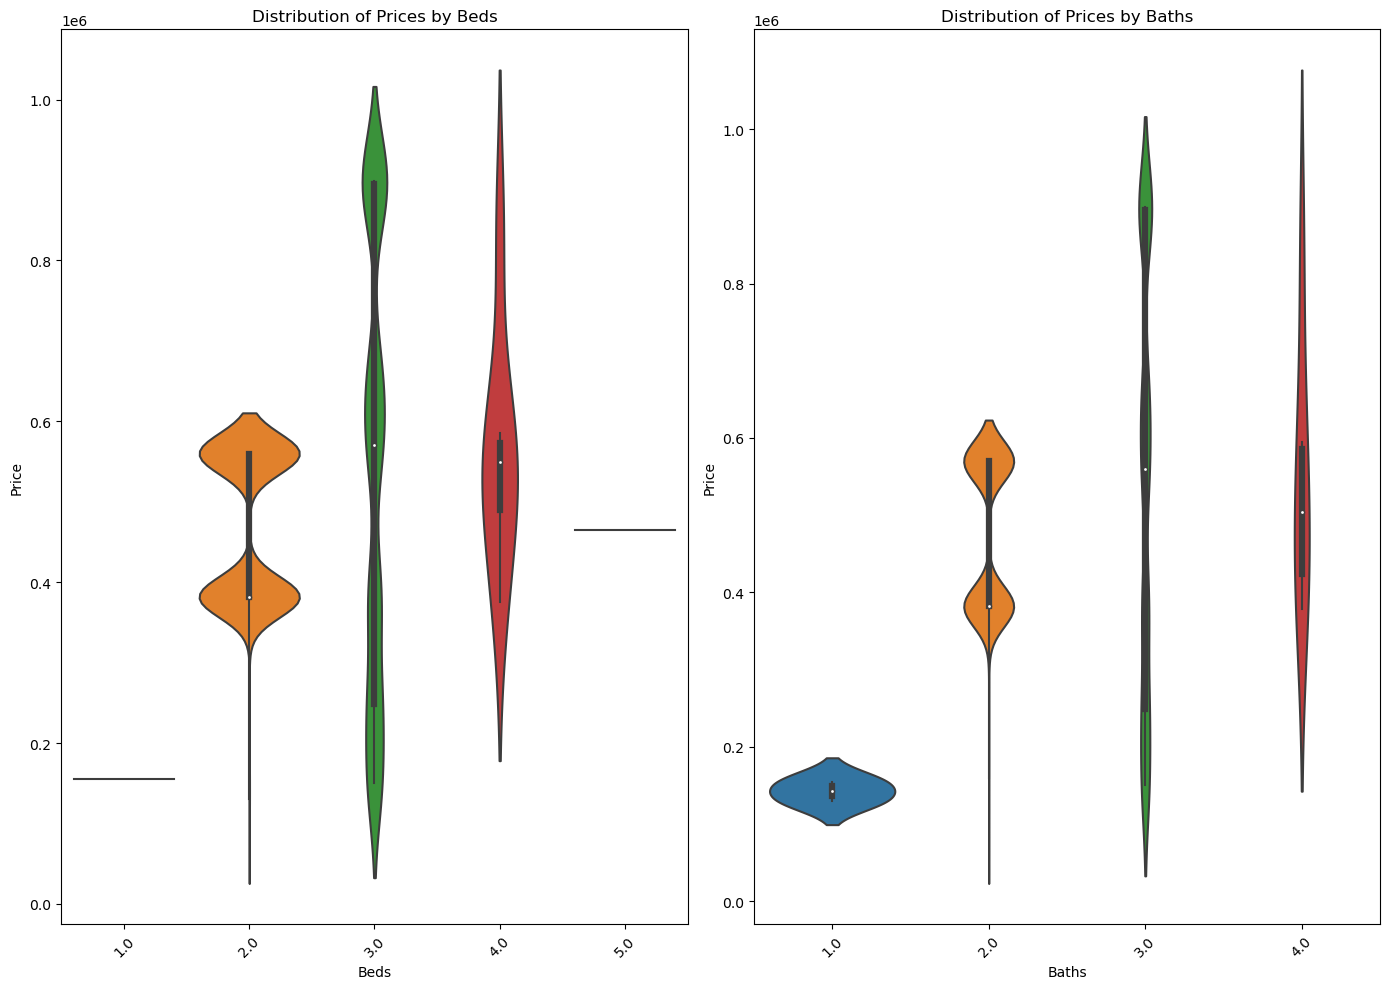

In [109]:
# Set up a grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

# Create violin plots with rotated labels
sns.violinplot(x='Beds', y='Price', data=df, ax=axes[0])
axes[0].set_title('Distribution of Prices by Beds')
axes[0].tick_params(axis='x', rotation=45) 

sns.violinplot(x='Baths', y='Price', data=df, ax=axes[1])
axes[1].set_title('Distribution of Prices by Baths')
axes[1].tick_params(axis='x', rotation=45)  



# Adjust layout
plt.tight_layout()
plt.show()

In [43]:
#create new copy of df 
df = df
df.head()

,Address,Agent,Price,Details,Beds,Baths,Sqft,Acres,Price_Per_Sqft,Price_Per_Acre,Street_Name,City
0,"504 Orchard View Dr N, Canonsburg, PA 15317",Nichole Merrell,419000,"3bds3ba1,960sqft",3.0,3.0,1960.0,7.2,213.775510,58194.444444,Orchard,Canonsburg
1,"327 Pleasant Ave, McMurray, PA 15317",Andrea Sweeney,270000,"3bds2ba1,788sqft",3.0,2.0,1788.0,7.2,151.006711,37500.000000,Pleasant,McMurray
2,"503 Hickory Cir N, Canonsburg, PA 15317",Susan Ulam,160000,2bds2ba884sqft,2.0,2.0,884.0,7.2,180.995475,22222.222222,Hickory,Canonsburg
3,"132 Highland Dr, McMurray, PA 15317",Nichole Merrell,465000,"5bds3ba2,372sqft",5.0,3.0,2372.0,7.2,196.037099,64583.333333,Highland,McMurray
4,"128 Rifgon Dr, Canonsburg, PA 15317",Dana Christoff,379000,"3bds4ba1,775sqft",3.0,4.0,1775.0,7.2,213.521127,52638.888889,Rifgon,Canonsburg


C:\Users\adria\AppData\Local\Temp\ipykernel_256380\878522006.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


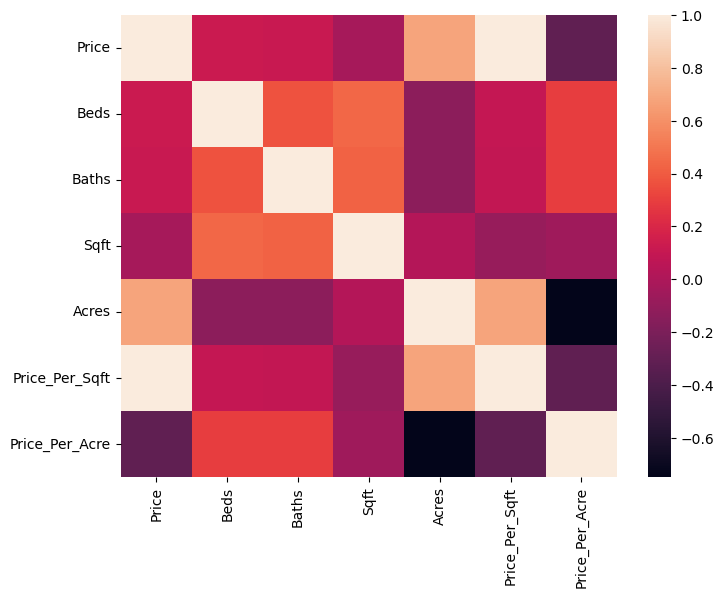

In [44]:
#visualize the pairplot
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()

fig = plt.figure(figsize= (8, 6))
sns.heatmap(corr)
plt.show()

#research question: how well do the selected features predict housing Prices in 15317? Can we accurately predict these prices, or are they subject to transient changes which can't be predicted? 


outliers

In [113]:
#quantitatively evaluate outliers
mean_values = df.mean()
std_values = df.std()

# z-score set to 2.5 for this analysis
z_score_threshold = 2.5

outliers = {}
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        lower_bound = mean_values[column] - z_score_threshold * std_values[column]
        upper_bound = mean_values[column] + z_score_threshold * std_values[column]

        #create outliers dict
        lower_outliers = df[df[column] < lower_bound]
        upper_outliers = df[df[column] > upper_bound]
        outliers[column] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'lower_outliers': lower_outliers,
            'upper_outliers': upper_outliers
        }

for column, info in outliers.items():
    print(f"\nOutliers for {column}:")
    print(f"Lower Bound: {info['lower_bound']}")
    print(f"Upper Bound: {info['upper_bound']}")
    print(f"Lower Outliers:\n{info['lower_outliers']}")
    print(f"Upper Outliers:\n{info['upper_outliers']}")


Outliers for Price:
Lower Bound: -94421.52274764178
Upper Bound: 1144595.8323451648
Lower Outliers:
Empty DataFrame
Columns: [Agent, Price, Beds, Baths, Sqft, Acres, Price_Per_Sqft, Price_Per_Acre, Street_Name, City]
Index: []
Upper Outliers:
Empty DataFrame
Columns: [Agent, Price, Beds, Baths, Sqft, Acres, Price_Per_Sqft, Price_Per_Acre, Street_Name, City]
Index: []

Outliers for Beds:
Lower Bound: 1.723934302950886
Upper Bound: 3.8378132030690657
Lower Outliers:
               Agent   Price  Beds  Baths    Sqft  Acres  Price_Per_Sqft  \
12  Valerie Loutsion  154900   1.0    1.0  2003.0    7.2       77.333999   

    Price_Per_Acre Street_Name        City  
12    21513.888889           E  Canonsburg  
Upper Outliers:
              Agent   Price  Beds  Baths    Sqft  Acres  Price_Per_Sqft  \
3   Nichole Merrell  465000   5.0    3.0  2372.0    7.2      196.037099   
5      John Fincham  374900   4.0    3.0  1800.0    7.2      208.277778   
9      Maria Folino  529900   4.0    3.0  3180

C:\Users\adria\AppData\Local\Temp\ipykernel_256380\3662349248.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()
C:\Users\adria\AppData\Local\Temp\ipykernel_256380\3662349248.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_values = df.std()


In [ ]:
encoding/ model prep

In [45]:
categorical_cols = ['Agent', 'Address', 'Details', 'Street_Name', 'City']

df[categorical_cols] = df[categorical_cols].astype('category')

In [47]:
df.dtypes

Address           category
Agent             category
Price                int32
Details           category
Beds               float64
Baths              float64
Sqft               float64
Acres              float64
Price_Per_Sqft     float64
Price_Per_Acre     float64
Street_Name       category
City              category
dtype: object

In [49]:
#drop the following columns from your dataset: casual, registered, dteday, instant
df.drop(['Details', 'Address'], axis=1, inplace=True)

In [54]:
# encode categorical cols
df_encoded = pd.get_dummies(df, columns=['Agent', 'Street_Name', 'City'], drop_first=True)

In [87]:
df_encoded.dtypes

Price                                        int32
Beds                                       float64
Baths                                      float64
Sqft                                       float64
Acres                                      float64
                                            ...   
City_McMurray                                uint8
City_Scarmazzi Homes: Build On Your Lot      uint8
City_Scenic Valley                           uint8
City_Sherwood Pond                           uint8
City_Walnut Grove                            uint8
Length: 63, dtype: object

In [112]:
#save to csv, just in case
df_encoded.to_csv('Prepped_Zillow_Model.csv')

In [55]:
#split x and y
features = df_encoded.drop(['Price'], axis=1)
target = df_encoded['Price']

In [56]:
#implement train/ test split with test 33%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer, mean_squared_error
from sklearn.model_selection import KFold
import numpy as np


model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [58]:
#use cross-val to output r2 and rmse, output r2 and rmse and document scores
rmse_score = make_scorer(mean_squared_error, greater_is_better=False)

# k-fold cross validation
k_fold_cross_val = KFold(n_splits=5, shuffle=True, random_state=42)

In [59]:
#calculate R2 and MSE, and output RMSE
r2 = cross_val_score(model, features, target, scoring='r2', cv=k_fold_cross_val)
mse = cross_val_score(model, features, target, scoring='neg_mean_squared_error', cv=k_fold_cross_val)
rmse = np.sqrt(np.abs(mse))

#mean scores
mean_r2 = np.mean(r2)
mean_mse = np.mean(mse)
mean_rmse = np.mean(rmse)

In [60]:
print(f"Cross-Val R2 Score: {mean_r2:.2f}")
print(f"Cross-Val MSE: {mean_mse:.2f}")
print(f"Cross-Val RMSE: {mean_rmse:.2f}")

Cross-Val R2 Score: 1.00
Cross-Val MSE: -95817939.61
Cross-Val RMSE: 6627.20


Linear Regression is oversimplifying and showing a perfect fit with the R2 score, but an unusual MSE. In this instance, we are very likely overfitting. Random-Forest Regression can help with feature selection and regularization and therefore can prevent the extent of overfitting we are seeing in the Linear Regression Model.

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from prettytable import PrettyTable

In [62]:
#create pretty table for model results
results = PrettyTable()
results.field_names = ['Model', 'R^2', 'MSE', 'RMSE']

In [64]:
#change features and target to X and Y for simplicity
X = df_encoded.drop('Price', axis=1) 
y = df_encoded['Price']

In [65]:
#test/train split  with random state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [66]:
#decision tree regressor
decision_tree = DecisionTreeRegressor(random_state=0)
dt_r2 = cross_val_score(decision_tree, X, y, scoring = 'r2', cv=5)
dt_mse = cross_val_score(decision_tree, X, y, scoring='neg_mean_squared_error', cv=5)
dt_rmse = np.sqrt(np.abs(dt_mse))

#mean scores
mean_r2_dt = np.mean(dt_r2)
mean_mse_dt = np.mean(dt_mse)
mean_rmse_dt = np.mean(dt_rmse)

print(f"Cross-Val R2 Score: {mean_r2_dt:.2f}")
print(f"Cross-Val MSE: {mean_mse_dt:.2f}")
print(f"Cross-Val RMSE: {mean_rmse_dt:.2f}")

Cross-Val R2 Score: 1.00
Cross-Val MSE: -139612702.65
Cross-Val RMSE: 5284.18


In [67]:
results.add_row(["Decision Tree", mean_r2_dt, mean_mse_dt, mean_rmse_dt])

In [68]:
#random forest
random_forest = RandomForestRegressor(random_state=0, n_estimators=30)
rf_r2 = cross_val_score(random_forest, X, y, scoring = 'r2', cv=5)
rf_mse = cross_val_score(random_forest, X, y, scoring='neg_mean_squared_error', cv=5)
rf_rmse = np.sqrt(np.abs(rf_mse))

#mean scores
mean_r2_rf = np.mean(rf_r2)
mean_mse_rf = np.mean(rf_mse)
mean_rmse_rf = np.mean(rf_rmse)

print(f"Cross-Val R2 Score: {mean_r2_rf:.2f}")
print(f"Cross-Val MSE: {mean_mse_rf:.2f}")
print(f"Cross-Val RMSE: {mean_rmse_rf:.2f}")

Cross-Val R2 Score: 1.00
Cross-Val MSE: -173345203.83
Cross-Val RMSE: 5888.04


In [69]:
results.add_row(["Random Forest", mean_r2_rf, mean_mse_rf, mean_rmse_rf])

In [70]:
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)
sgd_r2 = cross_val_score(sgd_model, X, y, scoring = 'r2', cv=5)
sgd_mse = cross_val_score(sgd_model, X, y, scoring='neg_mean_squared_error', cv=5)
sgd_rmse = np.sqrt(np.abs(sgd_mse))

#mean scores
mean_r2_sgd = np.mean(sgd_r2)
mean_mse_sgd = np.mean(sgd_mse)
mean_rmse_sgd = np.mean(sgd_rmse)

print(f"Cross-Val R2 Score: {mean_r2_sgd:.2f}")
print(f"Cross-Val MSE: {mean_mse_sgd:.2f}")
print(f"Cross-Val RMSE: {mean_rmse_sgd:.2f}")

Cross-Val R2 Score: -52150821468849964559892480.00
Cross-Val MSE: -3209915167419838256356023356522233856.00
Cross-Val RMSE: 1523749912463816704.00


In [71]:
results.add_row(["SGDRegressor", mean_r2_sgd, mean_mse_sgd, mean_rmse_sgd])

In [72]:
#lasso regressor
lasso_model = Lasso(alpha=0.1)
lasso_r2 = cross_val_score(lasso_model, X, y, scoring = 'r2', cv=5)
lasso_mse = cross_val_score(lasso_model, X, y, scoring='neg_mean_squared_error', cv=5)
lasso_rmse = np.sqrt(np.abs(lasso_mse))

#mean scores
mean_r2_lasso = np.mean(lasso_r2)
mean_mse_lasso = np.mean(lasso_mse)
mean_rmse_lasso = np.mean(lasso_rmse)

print(f"Cross-Val R2 Score: {mean_r2_lasso:.2f}")
print(f"Cross-Val MSE: {mean_mse_lasso:.2f}")
print(f"Cross-Val RMSE: {mean_rmse_lasso:.2f}")

Cross-Val R2 Score: 0.98
Cross-Val MSE: -1330069147.83
Cross-Val RMSE: 16328.40


In [73]:
results.add_row(["Lasso Regressor", mean_r2_lasso, mean_mse_lasso, mean_rmse_lasso])

In [74]:
# ElasticNet Regressor
EN_model = ElasticNet(random_state=0)
EN_r2 = cross_val_score(EN_model, X, y, scoring = 'r2', cv=5)
EN_mse = cross_val_score(EN_model, X, y, scoring='neg_mean_squared_error', cv=5)
EN_rmse = np.sqrt(np.abs(EN_mse))

#mean scores
mean_r2_EN = np.mean(EN_r2)
mean_mse_EN = np.mean(EN_mse)
mean_rmse_EN = np.mean(EN_rmse)

print(f"Cross-Val R2 Score: {mean_r2_EN:.2f}")
print(f"Cross-Val MSE: {mean_mse_EN:.2f}")
print(f"Cross-Val RMSE: {mean_rmse_EN:.2f}")


Cross-Val R2 Score: 1.00
Cross-Val MSE: -7236872.11
Cross-Val RMSE: 1602.48


In [75]:
results.add_row(["ElasticNet Regressor", mean_r2_EN, mean_mse_EN, mean_rmse_EN])

In [76]:
#ridge regressor model
ridge_model = Ridge(alpha=0.5)
ridge_r2 = cross_val_score(ridge_model, X, y, scoring = 'r2', cv=5)
ridge_mse = cross_val_score(ridge_model, X, y, scoring='neg_mean_squared_error', cv=5)
ridge_rmse = np.sqrt(np.abs(ridge_mse))

#mean scores
mean_r2_ridge = np.mean(ridge_r2)
mean_mse_ridge = np.mean(ridge_mse)
mean_rmse_ridge = np.mean(ridge_rmse)

print(f"Cross-Val R2 Score: {mean_r2_ridge:.2f}")
print(f"Cross-Val MSE: {mean_mse_ridge:.2f}")
print(f"Cross-Val RMSE: {mean_rmse_ridge:.2f}")

Cross-Val R2 Score: 1.00
Cross-Val MSE: -7206422.39
Cross-Val RMSE: 1223.93


In [77]:
results.add_row(["Ridge Regressor", mean_r2_ridge, mean_mse_ridge, mean_rmse_ridge])

In [78]:
#bagging regressor
bag_model = BaggingRegressor()
bag_r2 = cross_val_score(bag_model, X, y, scoring = 'r2', cv=5)
bag_mse = cross_val_score(bag_model, X, y, scoring='neg_mean_squared_error', cv=5)
bag_rmse = np.sqrt(np.abs(bag_mse))

#mean scores
mean_r2_bag = np.mean(bag_r2)
mean_mse_bag = np.mean(bag_mse)
mean_rmse_bag = np.mean(bag_rmse)

print(f"Cross-Val R2 Score: {mean_r2_bag:.2f}")
print(f"Cross-Val MSE: {mean_mse_bag:.2f}")
print(f"Cross-Val RMSE: {mean_rmse_bag:.2f}")

Cross-Val R2 Score: 1.00
Cross-Val MSE: -202913512.69
Cross-Val RMSE: 6370.46


In [79]:
results.add_row(["Bagging Regressor", mean_r2_bag, mean_mse_bag, mean_rmse_bag])

In [80]:
results

Model,R^2,MSE,RMSE
Decision Tree,0.9976931712198155,-139612702.64639175,5284.178321109002
Random Forest,0.9971358071471013,-173345203.82638413,5888.042184400247
SGDRegressor,-5.2150821468849965e+25,-3.209915167419838e+36,1.5237499124638167e+18
Lasso Regressor,0.978023190479559,-1330069147.8269842,16328.404297985737
ElasticNet Regressor,0.9998804875059705,-7236872.107367215,1602.476994132763
Ridge Regressor,0.999880928062867,-7206422.3889328865,1223.930465356691
Bagging Regressor,0.9964219720370855,-202913512.69003436,6370.455441960714


The Ridge Regressor shows extremely high R-squared value, indicating a very good fit to the data. The MSE and RMSE values are also quite low, suggesting accurate predictions. Ridge Regression is a regularized linear regression method that adds a penalty term to the linear regression cost function. This penalty helps prevent overfitting by discouraging overly complex models.

While the ElasticNet Regressor also performed well, its very high R-squared value might be indicative of potential overfitting. Therefore, the Ridge Regressor, with a slightly higher RMSE but likely better generalizability, seems to be the more robust model in this case. However, it's essential to perform additional validation and testing to confirm the model's performance on unseen data.

In [81]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'bootstrap': [True, False],
    'max_depth': list(range(10, 111, 10)),
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': list(range(200, 2001, 200))
}

# Randomized Search CV
random_search = RandomizedSearchCV(ridge_model, param_distributions=params, n_iter=20, cv=3, n_jobs=3, random_state=0)

In [83]:

params = {
    'alpha': [0.1, 1.0, 10.0], 
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

ridge_model = Ridge()

# RS CV
random_search = RandomizedSearchCV(ridge_model, param_distributions=params, n_iter=20, cv=3, n_jobs=3, random_state=0)

random_search.fit(X, y)

# best estimator
best_ridge_model = random_search.best_estimator_

# cross val
r2_scores = cross_val_score(best_ridge_model, X, y, cv=3, scoring='r2')
mse_scores = -cross_val_score(best_ridge_model, X, y, cv=3, scoring='neg_mean_squared_error')
rmse_scores = (mse_scores ** 0.5)

print("R2 scores:", r2_scores)
print("MSE scores:", mse_scores)
print("RMSE scores:", rmse_scores)

R2 scores: [0.99964527 0.99999992 0.99999992]
MSE scores: [2.16169907e+07 5.15119925e+03 5.07835487e+03]
RMSE scores: [4649.40756492   71.77185554   71.26257693]


In [85]:
# finally make predictions using this best estimator
y_preds = best_ridge_model.predict(X_test) 

#score the model
test_r2 = r2_score(y_test, y_preds)
test_mse = mean_squared_error(y_test, y_preds)
test_rmse = test_mse ** 0.5

print("Test R2:", test_r2)
print("Test RMSE:", test_rmse)

Test R2: 0.9999206117792626
Test RMSE: 2187.093110798936


In the given context, the best estimator is a Ridge Regressor that has been tuned using a Randomized Search. You can state that your best estimator is a Ridge Regressor with hyperparameters optimized through Randomized Search Cross-Validation.

Now, let's interpret the results:

Test R2 Score: 0.9999: R-squared (R2) is a measure of how well the model explains the variance in the target variable. A value close to 1.0 indicates that the model is able to explain a large proportion of the variance in the test set.

Test RMSE (Root Mean Squared Error): 2187.09: RMSE is a measure of the average magnitude of the errors between predicted and actual values. In the context of housing prices, it represents the average error in predicting the price. A lower RMSE indicates better performance, and in this case, 2187.09 suggests that, on average, your predictions are off by approximately $2187.09 in the housing price.

The high R2 score and low RMSE indicate that the model is performing very well on the test set. However, it's crucial to consider the context of your specific problem. For housing prices, a low RMSE is desirable as it signifies that your model is making accurate predictions. Additionally, the high R2 score indicates that a large proportion of the variability in the housing prices has been captured by your model.

In summary, your Ridge Regressor, after hyperparameter tuning, seems to be a strong model for predicting housing prices on the given dataset. Always remember to validate your model on an independent test set to ensure its generalization to new, unseen data.

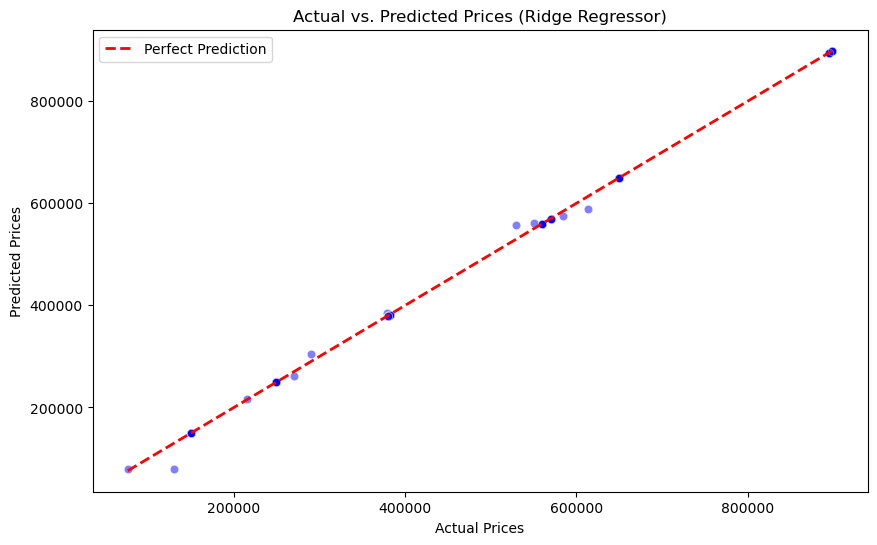

In [86]:
ridge_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=ridge_results, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Prices (Ridge Regressor)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Add a diagonal line for comparison
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.legend()
plt.show()

In [95]:
from sklearn.model_selection import GridSearchCV, learning_curve
train_sizes, train_scores, test_scores = learning_curve(best_ridge_model, X_train, y_train, cv=5, n_jobs=-1)

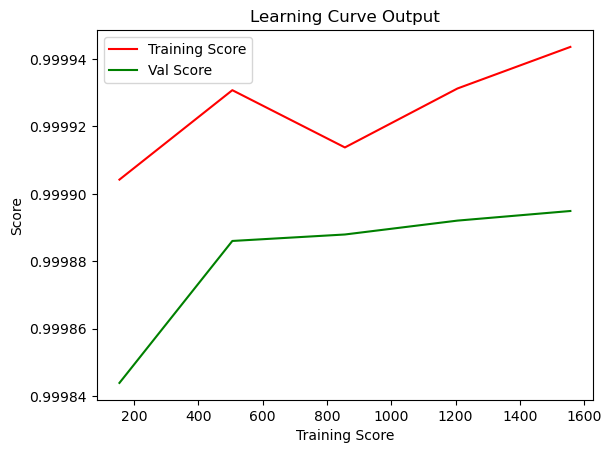

In [96]:
plt.figure()
plt.title("Learning Curve Output")
plt.xlabel("Training Score")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores.mean(axis=1), 'r', label="Training Score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'g', label="Val Score")
plt.legend(loc="best")
plt.show()

does not appear that this model focusing on 15317 would greatly benefit from more training data. The training and validation scores are both increasing, which may mean that this model is not either underfitting not overfitting. This model has already reached a good level of performance, but as other geographic areas are explored, this may not be the case.